# Importing libraries 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

print("pandas version" , pd.__version__)

pandas version 2.1.4


# Data Preperation 



## Loading Data 

In [2]:
test_data = pd.read_csv("../input/air-quality-datasets/test.csv")
train_data = pd.read_csv("../input/air-quality-datasets/train.csv")

## Data Exploratory 

In [3]:
train_data.describe()

,Id,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,2531.835667,30.049900,70.246200,20.184867,30.370900,26.472333,10.004367,1.501437,8.42090,497.793000
std,1438.539584,6.723611,15.824024,24.166374,27.061565,8.854902,6.791633,0.544815,3.65738,151.567075
min,1.000000,13.400000,36.100000,0.000000,0.100000,7.400000,-6.200000,0.650000,2.50000,189.000000
25%,1283.750000,25.175000,58.700000,4.600000,12.475000,20.175000,5.100000,1.030000,5.30000,384.000000
50%,2561.000000,29.000000,70.100000,12.100000,21.800000,25.300000,7.900000,1.420000,7.70000,493.000000
75%,3776.250000,34.025000,80.500000,26.425000,38.700000,32.000000,13.600000,1.850000,11.10000,600.000000
max,4997.000000,58.600000,128.100000,216.900000,240.000000,64.900000,44.900000,3.650000,25.80000,957.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             3000 non-null   int64  
 1   Temperature                    3000 non-null   float64
 2   Humidity                       3000 non-null   float64
 3   PM2.5                          3000 non-null   float64
 4   PM10                           3000 non-null   float64
 5   NO2                            3000 non-null   float64
 6   SO2                            3000 non-null   float64
 7   CO                             3000 non-null   float64
 8   Proximity_to_Industrial_Areas  3000 non-null   float64
 9   Population_Density             3000 non-null   int64  
 10  Air Quality                    3000 non-null   object 
dtypes: float64(8), int64(2), object(1)
memory usage: 257.9+ KB


In [5]:
test_data.describe()

,Id,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2450.996500,29.997700,69.771000,20.078050,29.989550,26.321750,10.030500,1.498730,8.432150,496.870000
std,1449.966841,6.717794,15.922427,25.131521,27.780301,8.957156,6.689494,0.547972,3.541047,154.553905
min,0.000000,14.100000,36.000000,0.000000,-0.200000,8.500000,-1.700000,0.740000,2.500000,188.000000
25%,1203.000000,24.975000,57.700000,4.700000,12.200000,20.000000,5.000000,1.030000,5.400000,379.000000
50%,2408.000000,29.000000,69.300000,11.800000,21.400000,25.100000,8.150000,1.400000,8.200000,496.000000
75%,3704.250000,33.900000,80.200000,25.800000,37.100000,31.700000,13.925000,1.830000,11.000000,602.000000
max,4999.000000,57.800000,122.300000,295.000000,315.800000,59.300000,40.500000,3.720000,21.700000,937.000000


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             2000 non-null   int64  
 1   Temperature                    2000 non-null   float64
 2   Humidity                       2000 non-null   float64
 3   PM2.5                          2000 non-null   float64
 4   PM10                           2000 non-null   float64
 5   NO2                            2000 non-null   float64
 6   SO2                            2000 non-null   float64
 7   CO                             2000 non-null   float64
 8   Proximity_to_Industrial_Areas  2000 non-null   float64
 9   Population_Density             2000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 156.4 KB


- No missing values
- In Train dataset Air quality seems to be an object data type which needs encoding
- test dataset needs scaling 

### Train Data 

In [7]:
le = LabelEncoder()
train_data['Air Quality'] = le.fit_transform(train_data['Air Quality'])

In [8]:
scaler = StandardScaler()
numeric_columns = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

In [9]:
print(train_data.head())

     Id  Temperature  Humidity     PM2.5      PM10       NO2       SO2  \
0  4576     1.435495 -0.666579  1.291892  1.098756 -0.380907  0.986029   
1  1088     0.572719 -1.064774 -0.069731 -0.209590 -0.053350 -0.030096   
2   479     0.542968  1.646746  2.094794  2.104039  0.726009  1.030209   
3   727    -0.111551  0.313108 -0.227001 -0.120889  0.161256  0.220254   
4  3783    -0.974326 -0.230460 -0.268387 -0.383297 -0.708464 -0.604428   

         CO  Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0  0.805111                      -1.236310           -0.091018            3  
1  0.841827                      -0.579993            0.707442            2  
2  1.521071                      -0.990191            0.390697            1  
3  0.107510                      -0.853458           -0.460553            2  
4 -1.342766                       0.787334           -0.995059            0  


### Test Data

In [10]:
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])
print(test_data.head())

     Id  Temperature  Humidity     PM2.5      PM10       NO2       SO2  \
0  1501    -1.182583  0.806111 -0.806415 -0.778758  0.680829  0.205527   
1  2586    -0.334683 -0.382154 -0.318051 -0.486782 -0.866595 -0.707513   
2  2653    -0.855323  0.268864 -0.736057 -0.823109 -0.053350 -0.309899   
3  1055     1.837132  1.747875  0.323443  0.858523  1.177811  2.856289   
4   705    -0.483437 -1.627304 -0.624313 -0.823109 -0.347022 -0.825325   

         CO  Proximity_to_Industrial_Areas  Population_Density  
0  0.180942                      -0.579993            0.093750  
1 -0.920534                       1.553037           -1.153431  
2 -0.755313                       1.197532           -1.113838  
3  0.401237                      -0.962844            1.103372  
4 -0.700239                       0.705295           -0.638721  


In [11]:
test_data.dtypes

Id                                 int64
Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density               float64
dtype: object

## Visualization

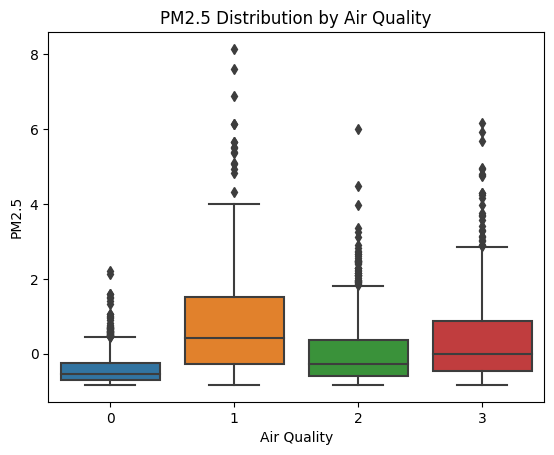

In [12]:
sns.boxplot(x='Air Quality', y='PM2.5', data=train_data)
plt.title('PM2.5 Distribution by Air Quality')
plt.show()

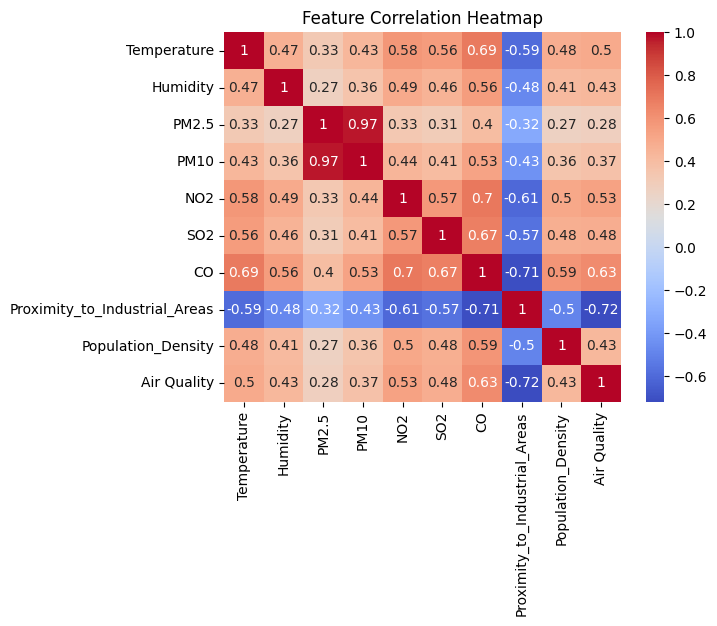

In [13]:
corr = train_data[numeric_columns + ['Air Quality']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Split the train data set 

In [14]:
X = train_data.drop(['Id', 'Air Quality'], axis=1)  
y = train_data['Air Quality']  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)

# Train the machine model 

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       0.88      0.88      0.88        56
           2       0.96      0.98      0.97       175
           3       0.93      0.90      0.91       128

    accuracy                           0.96       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.96      0.96      0.96       600

Validation Accuracy: 0.96


In [25]:
X_test = test_data.drop(['Id'], axis=1)
y_test_pred = model.predict(X_test)

y_test_pred_labels = le.inverse_transform(y_test_pred)

submission = test_data[['Id']].copy()
submission['Air Quality'] = y_test_pred_labels
submission.to_csv('submission.csv', index=False)

print("file created successfully")

file created successfully


In [24]:
print(submission.head())

     Id  Air Quality
0  1501            2
1  2586            0
2  2653            0
3  1055            3
4   705            0
